# CIFAR 10 DATASET 
## CNN 

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras as keras


1.12.0


In [21]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# DIFFERNCE BETWEEN A COLORED IMAGE SHOWN HERE vs MNIST IMAGE

In [5]:
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


## Using Matplotlib to turn the above data into a visual picture for us to see 

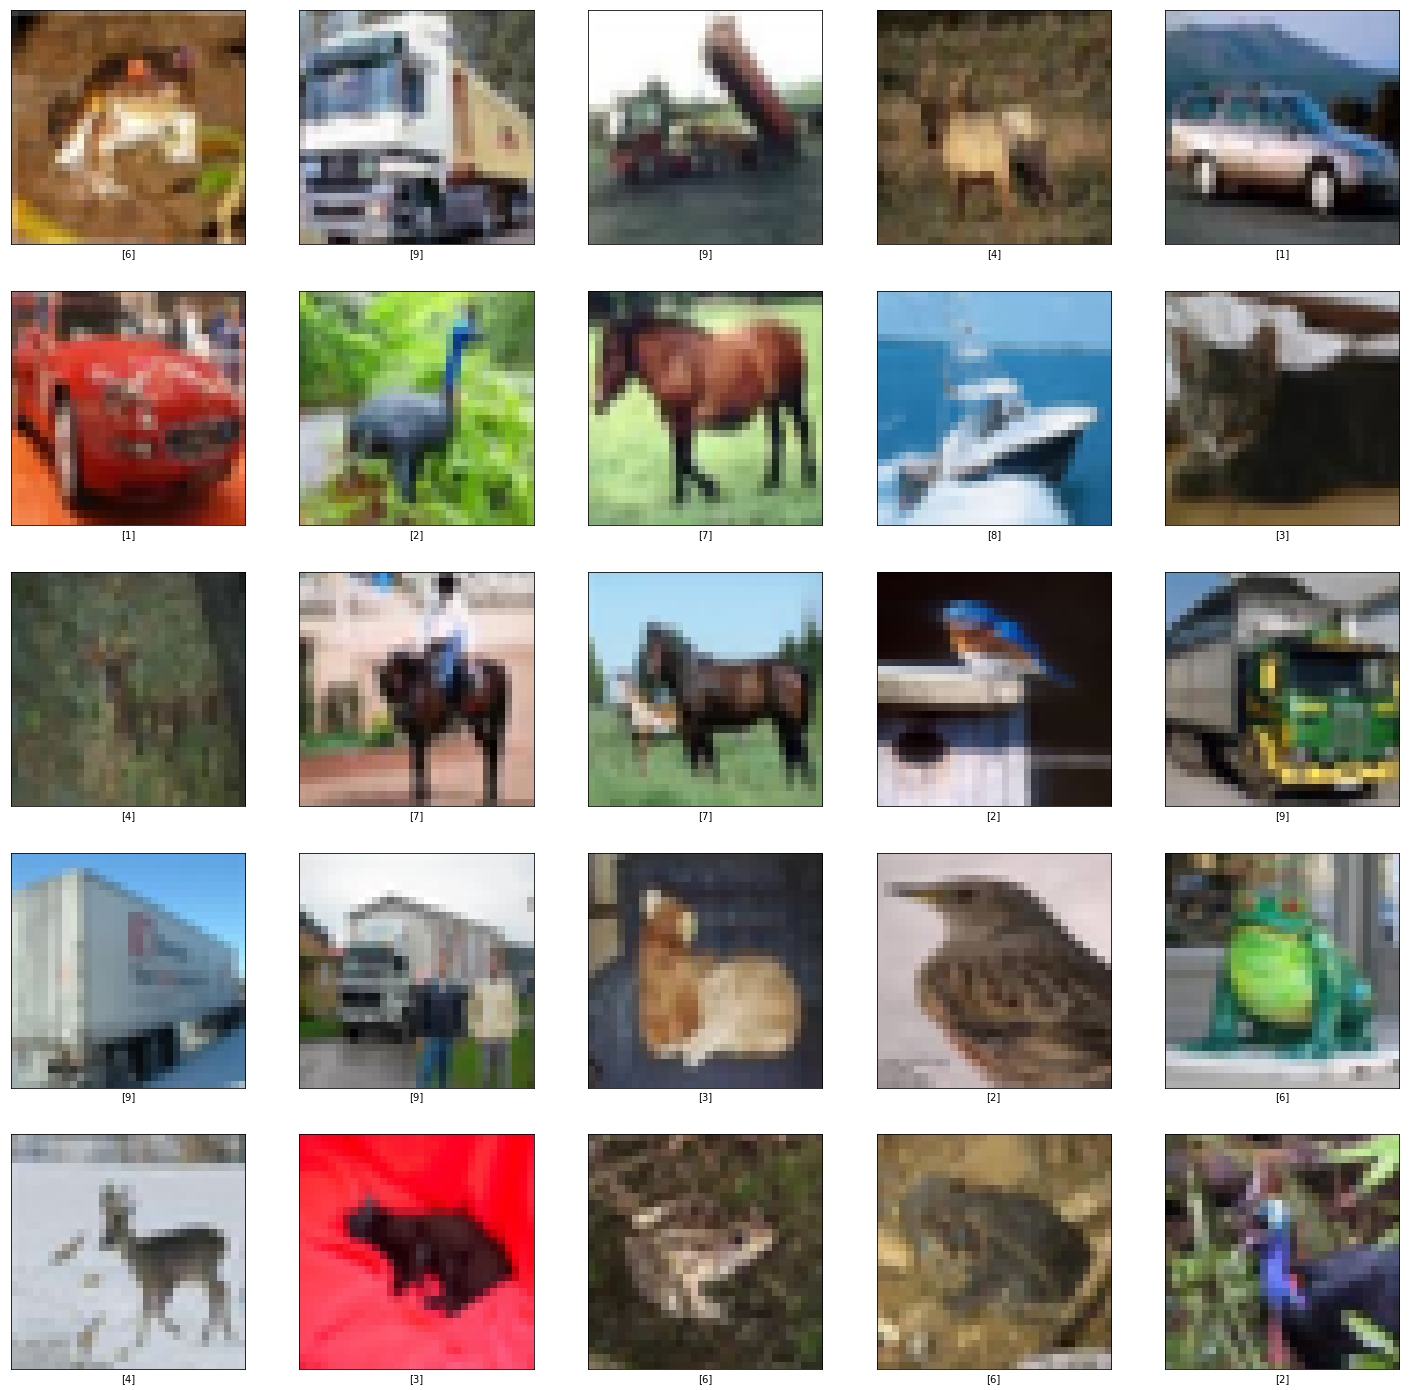

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
   
plt.show()

In [18]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Building the Convolutional Model

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax')) #output layer notice we only have 10 neurons represting the number of our data


In [22]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model.fit(x_train,y_train,epochs=25)



Epoch 1/25
50000/50000 [==============================] - 268s 5ms/step - loss: 1.8148 - acc: 0.3366
Epoch 2/25
50000/50000 [==============================] - 267s 5ms/step - loss: 1.5049 - acc: 0.4526
Epoch 3/25
50000/50000 [==============================] - 268s 5ms/step - loss: 1.3524 - acc: 0.5166
Epoch 4/25
50000/50000 [==============================] - 268s 5ms/step - loss: 1.2493 - acc: 0.5577
Epoch 5/25
50000/50000 [==============================] - 266s 5ms/step - loss: 1.1710 - acc: 0.5900
Epoch 6/25
50000/50000 [==============================] - 285s 6ms/step - loss: 1.1033 - acc: 0.6147
Epoch 7/25
50000/50000 [==============================] - 272s 5ms/step - loss: 1.0465 - acc: 0.6333 2s - loss: 1.0469 - acc: 0.633 - ETA: 2s - loss: 1.0470 -
Epoch 8/25
50000/50000 [==============================] - 263s 5ms/step - loss: 0.9996 - acc: 0.6516
Epoch 9/25
50000/50000 [==============================] - 270s 5ms/step - loss: 0.9652 - acc: 0.6628
Epoch 10/25
50000/50000 [========

# ACCURACY IN RESPECT TO THE VALIDATION DATA  

In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 10s 996us/step
0.8392209086418152
0.7053


In [23]:
predictions = model.predict(x_test)
print(predictions)


[[4.44466335e-04 5.79622108e-04 1.78779999e-03 ... 6.79653196e-04
  2.06720689e-03 1.54056994e-03]
 [3.71222908e-04 1.12896435e-01 2.39096867e-08 ... 2.93688997e-11
  8.86551440e-01 1.80891133e-04]
 [6.54601026e-03 8.51452257e-03 2.56099120e-05 ... 1.43567559e-06
  9.79458690e-01 5.34415990e-03]
 ...
 [1.49422931e-05 9.54513482e-08 7.10610254e-03 ... 1.39284609e-02
  5.40104338e-07 2.11511224e-06]
 [2.12943912e-01 7.00291157e-01 4.72374307e-03 ... 1.23917370e-03
  3.39616346e-03 3.50836967e-03]
 [1.69131781e-07 1.53519963e-07 7.75328663e-05 ... 9.88632262e-01
  4.34559588e-09 1.40658486e-07]]


# PREDICTION VISUALISTAION

In [24]:
import numpy as np

print(np.argmax(predictions[7]))

6


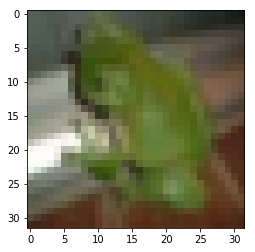

[6]


In [26]:
plt.imshow(x_test[7],cmap=plt.cm.binary)
plt.show()
print(y_test[7])